In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
keras = tf.keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
def plots(model):
    plt.plot(model.history.history["loss"], label="loss")
    plt.plot(model.history.history["val_loss"], label="validation loss")
    plt.title("Loss")
    plt.legend()
    plt.show()
    
    plt.plot(model.history.history["accuracy"], label="accuracy")
    plt.plot(model.history.history["val_accuracy"], label="validation accuracy")
    plt.title("Accuracy")
    plt.legend()
    plt.show()


In [3]:
def predict_review(model, reviews):
  # Create the sequences
  padding_type='post'
  sample_sequences = tokenizer.texts_to_sequences(reviews)
  reviews_padded = pad_sequences(sample_sequences, padding=padding_type, 
                                 maxlen=max_length) 
  classes = model.predict(reviews_padded)
  for x in range(len(reviews_padded)):
    print(reviews[x])
    print(classes[x])
    print('\n')


In [4]:
df = pd.read_csv("combined_data.csv")
df.head()

,Unnamed: 0,text,sentiment
0,0,So there is no way for me to plug it in here i...,0
1,1,Good case Excellent value.,1
2,2,Great for the jawbone.,1
3,3,Tied to charger for conversations lasting more...,0
4,4,The mic is great.,1


In [5]:
X = np.array(df.text)
y = np.array(df.sentiment)

train_size = int(len(df.text)*0.8)

X_train = X[:train_size]
X_test = X[train_size:]

y_train = y[:train_size]
y_test = y[train_size:]

In [6]:
vocab_size = 500
oov_tok = "<OOV>"
max_length = 100
padding = "post"
truc = "post"
embedding = 16

In [7]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

In [8]:
tokenizer.fit_on_texts(X_train)
X_sequence = tokenizer.texts_to_sequences(X_train)
X_pad = pad_sequences(X_sequence, maxlen=100, padding=padding, truncating=truc)

In [9]:
X_test_sequence = tokenizer.texts_to_sequences(X_test)
X_test_pad = pad_sequences(sequences=X_test_sequence, maxlen=max_length, padding=padding, truncating=truc)

In [10]:
print(X_pad.shape, X_test_pad.shape, y_train.shape, y_test.shape)

(1593, 100) (399, 100) (1593,) (399,)


In [11]:
# model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding, input_shape=[max_length]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(X_pad, y_train, epochs=10, validation_data = (X_test_pad, y_test))

Epoch 1/10
50/50 [==============================] - 0s 7ms/step - loss: 0.6924 - accuracy: 0.5204 - val_loss: 0.7005 - val_accuracy: 0.4110
Epoch 2/10
50/50 [==============================] - 0s 3ms/step - loss: 0.6885 - accuracy: 0.5229 - val_loss: 0.6946 - val_accuracy: 0.4110
Epoch 3/10
50/50 [==============================] - 0s 4ms/step - loss: 0.6794 - accuracy: 0.5424 - val_loss: 0.6971 - val_accuracy: 0.4261
Epoch 4/10
50/50 [==============================] - 0s 3ms/step - loss: 0.6596 - accuracy: 0.5951 - val_loss: 0.6835 - val_accuracy: 0.4862
Epoch 5/10
50/50 [==============================] - 0s 3ms/step - loss: 0.6265 - accuracy: 0.6497 - val_loss: 0.6816 - val_accuracy: 0.4687
Epoch 6/10
50/50 [==============================] - 0s 3ms/step - loss: 0.5815 - accuracy: 0.7213 - val_loss: 0.6520 - val_accuracy: 0.5915
Epoch 7/10
50/50 [==============================] - 0s 3ms/step - loss: 0.5346 - accuracy: 0.7815 - val_loss: 0.6130 - val_accuracy: 0.6767
Epoch 8/10
50/50 [==

In [12]:
model.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

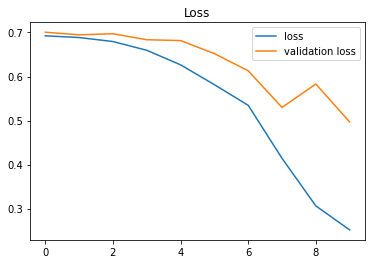

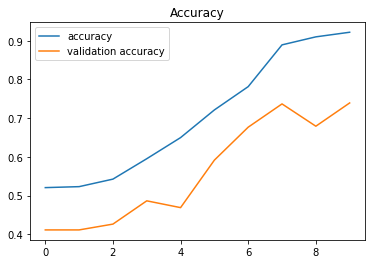

In [13]:
plots(model)

In [14]:
predict = model.predict(X_test_pad)

In [15]:
reviews = ["This is good", "This is bad", "Dogs are funny", "pizza is not healty", "I don't eat ice-cream"]
predict_review(model,reviews)

This is good
[0.95691437]


This is bad
[0.28147054]


Dogs are funny
[0.59768134]


pizza is not healty
[0.18763287]


I don't eat ice-cream
[0.17358361]




In [16]:
weights = model.layers[0].get_weights()[0]

In [17]:
weights

array([[-0.05202378, -0.02312239, -0.02941554, ..., -0.01329068,
        -0.06370749, -0.04575642],
       [-0.00567139,  0.10639822,  0.05889763, ..., -0.03280127,
        -0.0282979 ,  0.09166368],
       [-0.03857871, -0.03901929, -0.00461248, ...,  0.08454724,
         0.01100603,  0.09816919],
       ...,
       [ 0.06298105,  0.0861014 , -0.06636418, ...,  0.03039843,
        -0.11592068,  0.16592702],
       [-0.06312305, -0.03111392,  0.1415811 , ..., -0.04650754,
        -0.00197572,  0.00573095],
       [ 0.21303809,  0.08326166,  0.20138372, ...,  0.20273213,
        -0.06519759, -0.17048527]], dtype=float32)

In [18]:
word_index = tokenizer.word_index

In [19]:
reverse_word_list = {j:i for (i,j) in word_index.items()}

In [20]:
weights.shape

(500, 16)

In [21]:
out_v = open("vect.tsv", "w", encoding="utf-8")
out_m = open("meta.tsv", "w", encoding="utf-8")

for i in range(1,len(weights)):
    word = reverse_word_list[i]
    embedding = weights[i]
    out_m.write(word + "\n")
    out_v.write("\t".join([str(x) for x in embedding])+"\n")
out_m.close()
out_v.close()

## Using different parameters and Global layer instead of flatten

In [22]:
vocab_size = 500
oov_tok = "<OOV>"
max_length = 50
padding = "post"
truc = "post"
embedding = 16

In [23]:
tokenizer_2 = Tokenizer(num_words=vocab_size)

tokenizer_2.fit_on_texts(X_train)
X_train_sequence = tokenizer_2.texts_to_sequences(X_train)
X_train_pad = pad_sequences(X_train_sequence, maxlen=max_length, padding=padding, truncating=truc)

X_test_sequence = tokenizer_2.texts_to_sequences(X_test)
X_test_pad = pad_sequences(X_test_sequence, maxlen=max_length, padding=padding, truncating=truc)

In [24]:
#model

keras.backend.clear_session()
model_2 = keras.Sequential([
    keras.layers.Embedding(vocab_size, embedding, input_shape=[max_length]),
    keras.layers.GlobalAvgPool1D(),
    keras.layers.Dense(6, activation="relu", kernel_initializer="he_uniform"),
    keras.layers.Dense(1, activation="sigmoid")
])

model_2.compile(optimizer="adam", loss=keras.losses.binary_crossentropy, metrics=["accuracy"])

model_2.fit(X_train_pad, y_train, epochs=10, validation_data=(X_test_pad, y_test))

Epoch 1/10
50/50 [==============================] - 0s 4ms/step - loss: 0.6920 - accuracy: 0.5223 - val_loss: 0.6994 - val_accuracy: 0.4110
Epoch 2/10
50/50 [==============================] - 0s 4ms/step - loss: 0.6893 - accuracy: 0.5229 - val_loss: 0.6987 - val_accuracy: 0.4110
Epoch 3/10
50/50 [==============================] - 0s 3ms/step - loss: 0.6865 - accuracy: 0.5242 - val_loss: 0.6965 - val_accuracy: 0.4160
Epoch 4/10
50/50 [==============================] - 0s 3ms/step - loss: 0.6822 - accuracy: 0.5392 - val_loss: 0.6922 - val_accuracy: 0.4336
Epoch 5/10
50/50 [==============================] - 0s 3ms/step - loss: 0.6762 - accuracy: 0.5618 - val_loss: 0.6899 - val_accuracy: 0.4536
Epoch 6/10
50/50 [==============================] - 0s 3ms/step - loss: 0.6671 - accuracy: 0.6208 - val_loss: 0.6806 - val_accuracy: 0.5388
Epoch 7/10
50/50 [==============================] - 0s 3ms/step - loss: 0.6547 - accuracy: 0.7006 - val_loss: 0.6775 - val_accuracy: 0.5263
Epoch 8/10
50/50 [==

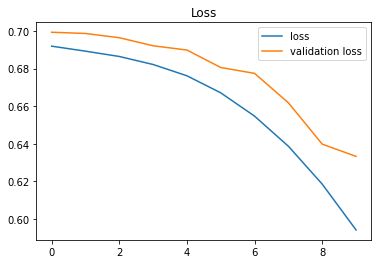

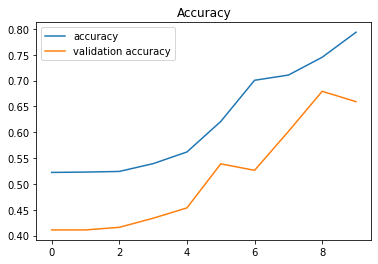

In [25]:
plots(model_2)

In [26]:
word_index_2 = tokenizer_2.word_index
reverse_word_list_2 = {j:i for i, j in word_index_2.items()}

weights_2 = model.layers[0].get_weights()[0]

out_v = open("vect_2.tsv", "w")
out_m = open("meta_2.tsv", "w")
for i in range(1,vocab_size):
    word = reverse_word_list_2[i]
    embedding = weights_2[i]
    out_m.write(word+"\n")
    out_v.write("\t".join([str(i) for i in embedding])+"\n")
out_m.close()
out_v.close()

In [27]:
reviews = ["This is good", "This is bad", "Dogs are funny", "pizza is not healty", "I don't eat ice-cream"]
predict_review(model_2,reviews)

This is good
[0.51446646]


This is bad
[0.497252]


Dogs are funny
[0.5496435]


pizza is not healty
[0.52342355]


I don't eat ice-cream
[0.5528013]


